# Análise de problemas ambientais por estado

O objetido desta análise é mostrar os principais problemas ambientais identificados nos estados e como os estados se assemelham de acordo com estes problemas.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; #sns.set()
import os

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# import pandas_profiling
# df.profile_report(style={'full_width':True})

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
data_dir = '../data/IBGE-municipios/'

df_orig = pd.read_csv(data_dir + 'ambiente-limpo.csv')

df_orig['NM_UF'] = df_orig['NM_UF'].str.replace('Espirito', 'Espírito')

df_orig

CodMun  Condições climáticas extremas (secas, enxurradas)  Poluição do ar  Poluição de algum corpo d’água  Assoreamento de algum corpo d’água  Diminuição de vazão de algum corpo d’água  Desmatamentos  Queimadas  Contaminação do solo (por agrotóxicos, fertilizantes)  Perda de solos por erosão e/ou desertificação (voçorocas, arenização)  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento (destinação inadequada do esgoto doméstico)  Outros      ID  CD_GCUF             NM_UF NM_UF_SIGLA   CD_GCMUN            NM_MUN_2018  AR_MUN_2018            REGIAO  COD UF  UF            NOME MUNIC    POP EST             CLASSE POP        NM_UF_NORM      NM_MUN_2018_NORM
0     1100015                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     1.0     11.0          Rondônia          RO  1100015.0  ALTA FLORESTA D'OESTE     7067.025         1 - Norte    11.0  RO  Alta Floresta DOeste    25437.0    4 - 20001 até 50000          rondonia  alta floresta doeste
1     1100023                                                0.0             0.0                             0.0                                 0.0                                        0.0            0.0        1.0                                                0.0                                                    0.0                                                            1.0                                           0.0                                                0.0                                                   1.0                   0.0     2.0     11.0          Rondônia          RO  1100023.0              ARIQUEMES     4426.571         1 - Norte    11.0  RO             Ariquemes   107345.0  6 - 100001 até 500000          rondonia             ariquemes
2     1100031                                                NaN             NaN                             NaN                                 NaN                                        NaN            NaN        NaN                                                NaN                                                    NaN                                                            NaN                                           NaN                                                NaN                                                   NaN                   NaN     3.0     11.0          Rondônia          RO  1100031.0                 CABIXI     1314.352         1 - Norte    11.0  RO                Cabixi     6224.0     2 - 5001 até 10000          rondonia                cabixi
3     1100049                                                0.0             0.0                             1.0                                 1.0                                        0.0            0.0        1.0                                                0.0                                                    0.0                                                            0.0                                           0.0                                                0.0                                                   0.0                   0.0     4.0     11.0          Rondônia          RO  1100049.0                 CACOAL     3792.892         1 - Norte    11.0  RO                Cacoal    88507.0   5 - 50001 até 100000          rondonia                cacoal
4     1100056                                                NaN             NaN                           

In [25]:
df = df_orig.iloc[:, list(range(1,14)) + [17]]

print(df.columns)

df.columns = ['Condições climáticas extremas', 'Poluição do ar', 'Poluição de corpo d’água', 'Assoreamento de corpo d’água', 'Diminuição de vazão de corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo', 'Perda de solos por erosão e/ou desertificação', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento', 'Estado']

df = df.dropna(how='any')

df

Index(['Condições climáticas extremas (secas, enxurradas)', 'Poluição do ar', 'Poluição de algum corpo d’água', 'Assoreamento de algum corpo d’água', 'Diminuição de vazão de algum corpo d’água', 'Desmatamentos', 'Queimadas', 'Contaminação do solo (por agrotóxicos, fertilizantes)', 'Perda de solos por erosão e/ou desertificação (voçorocas, arenização)', 'Degradação de áreas legalmente protegidas', 'Diminuição da biodiversidade (fauna e flora)', 'Existência de moradia em situação de risco ambiental', 'Falta de saneamento (destinação inadequada do esgoto doméstico)', 'NM_UF'], dtype='object')


Condições climáticas extremas  Poluição do ar  Poluição de corpo d’água  Assoreamento de corpo d’água  Diminuição de vazão de corpo d’água  Desmatamentos  Queimadas  Contaminação do solo  Perda de solos por erosão e/ou desertificação  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento            Estado
1                               0.0             0.0                       0.0                           0.0                                  0.0            0.0        1.0                   0.0                                            0.0                                        1.0                                           0.0                                                0.0                     1.0          Rondônia
3                               0.0             0.0                       1.0                           1.0                                  0.0            0.0        1.0                   0.0                                            0.0                                        0.0                                           0.0                                                0.0                     0.0          Rondônia
5                               0.0             0.0                       0.0                           1.0                                  0.0            0.0        0.0                   0.0                                            0.0                                        0.0                                           0.0                                                1.0                     0.0          Rondônia
7                               0.0             0.0                       0.0                           0.0                                  0.0            1.0        1.0                   0.0                                            0.0                                        0.0                                           0.0                                                0.0                     1.0          Rondônia
8                               0.0             0.0                       0.0                           0.0                                  1.0            0.0        0.0                   0.0                                            0.0                                        1.0                                           0.0                                                0.0                     1.0          Rondônia
...                             ...             ...                       ...                           ...                                  ...            ...        ...                   ...                                            ...                                        ...                                           ...                                                ...                     ...               ...
5563                            0.0             0.0                       1.0                           1.0                                  0.0            0.0        0.0                   0.0                                            1.0                                        0.0                                           0.0                                                0.0                     0.0             Goiás
5565                            0.0             0.0                       1.0                           1.0                                  0.0            0.0        1.0                   0.0                                            0.0                                        0.0                                           0.0                                                0.0                     0.0             Goiás
5566                            0.0             0.0                       0.0                           0.0                                  1.0            1.0        0.0                   0.0                

In [26]:
df_medias = df.groupby('Estado').mean()

df_medias

Condições climáticas extremas  Poluição do ar  Poluição de corpo d’água  Assoreamento de corpo d’água  Diminuição de vazão de corpo d’água  Desmatamentos  Queimadas  Contaminação do solo  Perda de solos por erosão e/ou desertificação  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento
Estado                                                                                                                                                                                                                                                                                                                                                                                                                            
Acre                                      0.214286        0.285714                  0.214286                      0.071429                             0.071429       0.357143   0.642857              0.000000                                       0.000000                                   0.214286                                      0.000000                                           0.214286                0.357143
Alagoas                                   0.722222        0.011111                  0.122222                      0.133333                             0.555556       0.188889   0.188889              0.022222                                       0.100000                                   0.033333                                      0.188889                                           0.077778                0.333333
Amapá                                     0.083333        0.416667                  0.500000                      0.166667                             0.416667       0.166667   0.666667              0.000000                                       0.166667                                   0.083333                                      0.000000                                           0.166667                0.083333
Amazonas                                  0.186047        0.069767                  0.255814                      0.116279                             0.000000       0.395349   0.697674              0.000000                                       0.069767                                   0.069767                                      0.093023                                           0.279070                0.488372
Bahia                                     0.687332        0.040431                  0.194070                      0.126685                             0.393531       0.442049   0.304582              0.075472                                       0.051213                                   0.051213                                      0.091644                                           0.037736                0.371968
Ceará                                     0.643275        0.058480                  0.122807                      0.099415                             0.286550       0.345029   0.461988              0.040936                                       0.070175                                   0.064327                                      0.070175                                           0.081871                0.426901
Distrito Federal                          1.000000        0.000000                  0.000000                      0.000000                             0.000000       1.000000   1.000000              0.000000                                       0.000000                                   0.000000                                      0.000000                                           0.000000                0.000000
Espírito Santo                            0.630137        0.054795                  0.260274                      0.164384                             0.561644       0.109589   0.191781              0.054795                                       0.06

## Agrupamentos de estados por situação ambiental

1 (branco) = presença do problema

0 (preto) = ausência do problema

- TODO: explicar os agrupamentos identificados abaixo

In [27]:
sns.clustermap(df_medias)

### Identificação automática de "regiões" de acordo com os tipos de problemas

- TODO: usar um algoritmo ode clusterização para identificar 5 clusters de estados
- TODO: fazer mapa de estados com as cores dos clusters identificados

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42) 
kmeans.fit(df_medias) 
df_medias['cluster'] = kmeans.labels_

df_medias[['cluster']].sort_values('cluster')

cluster
Estado                      
Distrito Federal           0
Alagoas                    1
Sergipe                    1
Bahia                      1
Ceará                      1
Espírito Santo             1
Rio Grande do Norte        1
Piauí                      1
Pernambuco                 1
Paraíba                    1
Acre                       2
Roraima                    2
Rondônia                   2
Pará                       2
Tocantins                  2
Mato Grosso                2
Maranhão                   2
Amazonas                   2
Mato Grosso do Sul         3
Rio Grande do Sul          3
Rio de Janeiro             3
Santa Catarina             3
São Paulo                  3
Paraná                     3
Minas Gerais               4
Goiás                      4
Amapá                      4

In [29]:
import geopandas as gpd
import pysal as ps

shp_dir = data_dir + 'shapefiles-br_unidades_da_federacao/'

dfm = gpd.read_file(shp_dir + 'BRUFE250GC_SIR.shp')

dfm['NM_ESTADO'] = dfm['NM_ESTADO'].str.title()
dfm['NM_ESTADO'] = dfm['NM_ESTADO'].str.replace(' D', ' d')

dfm

NM_ESTADO     NM_REGIAO CD_GEOCUF                                           geometry
0                  Acre         NORTE        12  POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...
1               Alagoas      NORDESTE        27  POLYGON ((-35.46659 -8.81764, -35.46658 -8.817...
2                 Amapá         NORTE        16  MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...
3                 Bahia      NORDESTE        29  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...
4                 Ceará      NORDESTE        23  POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...
5      Distrito Federal  CENTRO-OESTE        53  POLYGON ((-48.05328 -15.50026, -48.03611 -15.5...
6        Espírito Santo       SUDESTE        32  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...
7                 Goiás  CENTRO-OESTE        52  POLYGON ((-50.16015 -12.42007, -50.15836 -12.4...
8              Maranhão      NORDESTE        21  MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ...
9           Mato Grosso  CENTRO-OESTE        51  POLYGON ((-57.93439 -7.65677, -57.93044 -7.657...
10   Mato Grosso do Sul  CENTRO-OESTE        50  POLYGON ((-56.10370 -17.17354, -56.10209 -17.1...
11         Minas Gerais       SUDESTE        31  POLYGON ((-44.20984 -14.24460, -44.20912 -14.2...
12                 Pará         NORTE        15  MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ...
13              Paraíba      NORDESTE        25  MULTIPOLYGON (((-34.85946 -6.98417, -34.85827 ...
14           Pernambuco      NORDESTE        26  MULTIPOLYGON (((-37.23361 -7.27440, -37.23284 ...
15                Piauí      NORDESTE        22  POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...
16       Rio de Janeiro       SUDESTE        33  MULTIPOLYGON (((-44.71892 -23.35908, -44.71956...
17  Rio Grande do Norte      NORDESTE        24  POLYGON ((-37.25329 -4.83156, -37.25326 -4.831...
18    Rio Grande do Sul           SUL        43  POLYGON ((-53.03183 -27.15947, -53.02991 -27.1...
19              Roraima         NORTE        14  POLYGON ((-60.20051 5.26434, -60.19828 5.26045...
20       Santa Catarina           SUL        42  MULTIPOLYGON (((-48.82145 -28.61110, -48.82159...
21            São Paulo       SUDESTE        35  MULTIPOLYGON (((-48.00174 -25.24890, -48.00195...
22              Sergipe      NORDESTE        28  POLYGON ((-37.99245 -9.52511, -37.98933 -9.527...
23            Tocantins         NORTE        17  POLYGON ((-48.35878 -5.17008, -48.35617 -5.171...
24               Paraná           SUL        41  POLYGON ((-52.05188 -22.53933, -52.04607 -22.5...
25             Rondônia         NORTE        11  POLYGON ((-62.86662 -7.97587, -62.86017 -7.982...
26             Amazonas         NORTE        13  POLYGON ((-67.32609 2.02971, -67.31682 2.00125...

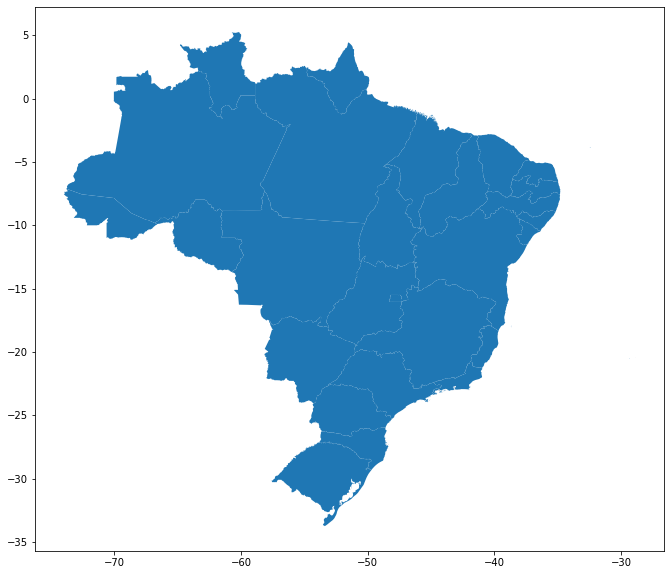

In [30]:
dfm.plot(figsize=(18, 10))

In [31]:
df_merged = dfm.merge(df_medias, how='left', left_on='NM_ESTADO', right_index=True)

df_merged

NM_ESTADO     NM_REGIAO CD_GEOCUF                                           geometry  Condições climáticas extremas  Poluição do ar  Poluição de corpo d’água  Assoreamento de corpo d’água  Diminuição de vazão de corpo d’água  Desmatamentos  Queimadas  Contaminação do solo  Perda de solos por erosão e/ou desertificação  Degradação de áreas legalmente protegidas  Diminuição da biodiversidade (fauna e flora)  Existência de moradia em situação de risco ambiental  Falta de saneamento  cluster
0                  Acre         NORTE        12  POLYGON ((-73.18253 -7.33550, -73.05413 -7.381...                       0.214286        0.285714                  0.214286                      0.071429                             0.071429       0.357143   0.642857              0.000000                                       0.000000                                   0.214286                                      0.000000                                           0.214286                0.357143        2
1               Alagoas      NORDESTE        27  POLYGON ((-35.46659 -8.81764, -35.46658 -8.817...                       0.722222        0.011111                  0.122222                      0.133333                             0.555556       0.188889   0.188889              0.022222                                       0.100000                                   0.033333                                      0.188889                                           0.077778                0.333333        1
2                 Amapá         NORTE        16  MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1...                       0.083333        0.416667                  0.500000                      0.166667                             0.416667       0.166667   0.666667              0.000000                                       0.166667                                   0.083333                                      0.000000                                           0.166667                0.083333        4
3                 Bahia      NORDESTE        29  MULTIPOLYGON (((-38.65484 -18.04242, -38.65819...                       0.687332        0.040431                  0.194070                      0.126685                             0.393531       0.442049   0.304582              0.075472                                       0.051213                                   0.051213                                      0.091644                                           0.037736                0.371968        1
4                 Ceará      NORDESTE        23  POLYGON ((-40.49717 -2.78451, -40.49173 -2.788...                       0.643275        0.058480                  0.122807                      0.099415                             0.286550       0.345029   0.461988              0.040936                                       0.070175                                   0.064327                                      0.070175                                           0.081871                0.426901        1
5      Distrito Federal  CENTRO-OESTE        53  POLYGON ((-48.05328 -15.50026, -48.03611 -15.5...                       1.000000        0.000000                  0.000000                      0.000000                             0.000000       1.000000   1.000000              0.000000                                       0.000000                                   0.000000                                      0.000000                                           0.000000                0.000000        0
6        Espírito Santo       SUDESTE        32  MULTIPOLYGON (((-40.39595 -20.62216, -40.39617...                       0.630137        0.054795                  0.260274                      0.164384                             0.561644       0.109589   0.191781              0.054795                                       0.068493                                   0.054795                                      0.068493                                           

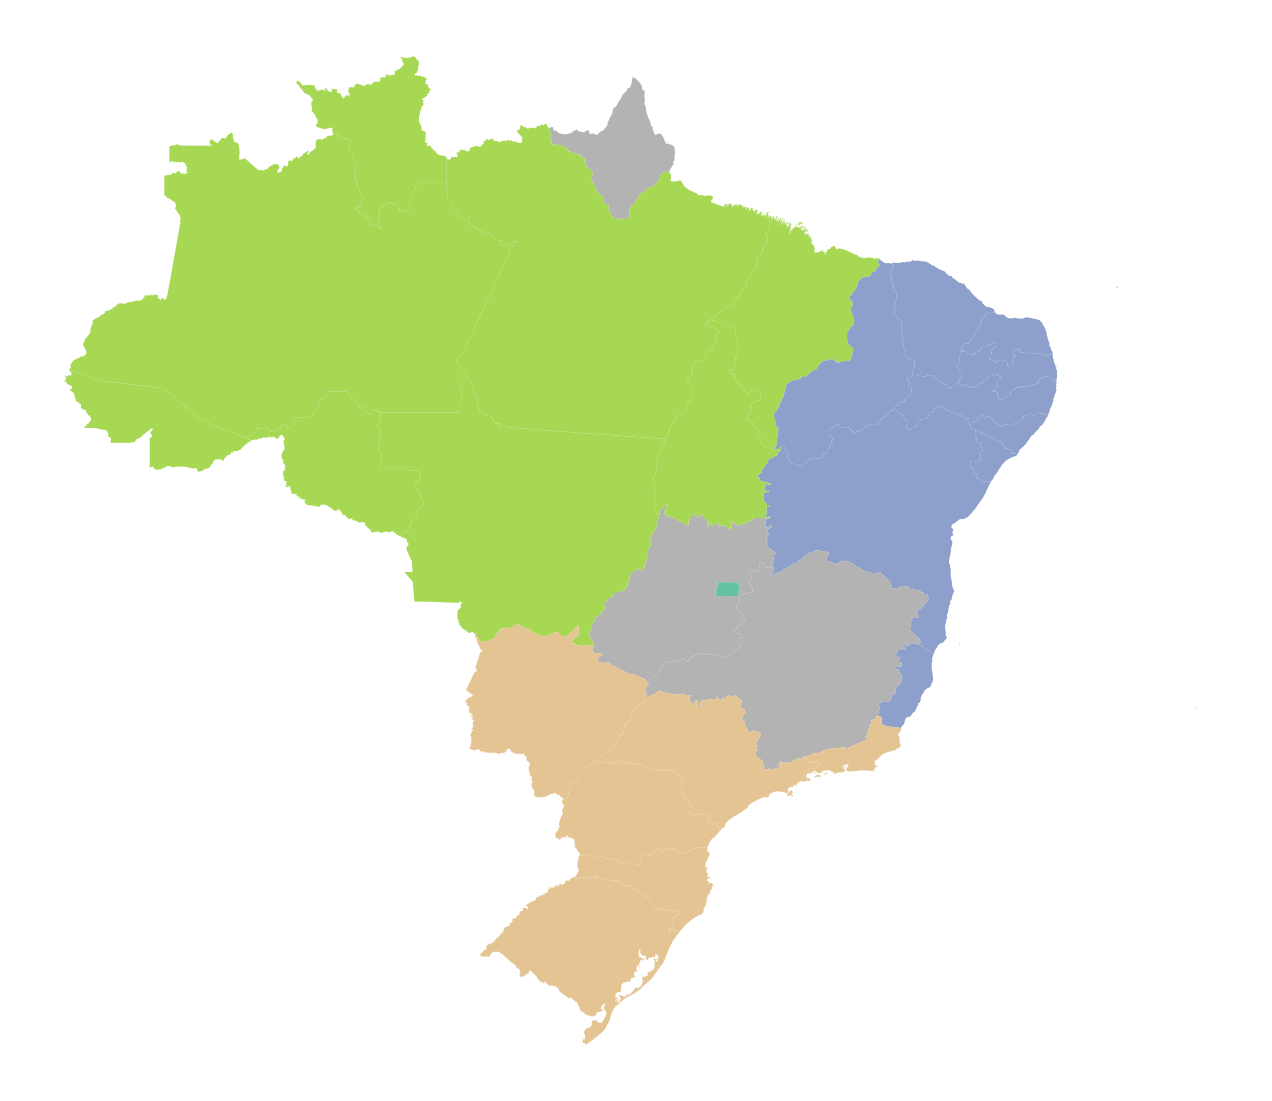

In [41]:
ax = df_merged.plot(column='cluster', cmap = 'Set2', figsize=(28, 20), legend=False)

ax.set_axis_off()

## Caracterização dos problemas

- TODO: fazer gráficos de barras com os principais problemas por região (usar média das notas dos estados)
- TODO: Fazer gráficos de barras com os principais problemas por cluster identificado